# Importing the required packages:

In [265]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

# Data Cleaning and Processing:

## Reading the parquet file into a pandas dataframe:

In [266]:
path = r"C:\Users\Sebma\OneDrive\Documents\Sparta_Global\Academy\Week 7\Cardiovascular-disease-data\heart_converted.parquet"
heart_df = pd.read_parquet(path)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(321), object(5)
memory usage: 1.1+ GB


In [267]:
heart_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,02032022,02,03,2022,1100.0,2022000001,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,02042022,02,04,2022,1100.0,2022000002,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,02022022,02,02,2022,1100.0,2022000003,2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,02032022,02,03,2022,1100.0,2022000004,2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,02022022,02,02,2022,1100.0,2022000005,2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0


## List of the desired column names:

In [268]:
variable_names = [
    "State",
    "Sex",
    "General Health",
    "Physical Health Days",
    "Mental Health Days",
    "Last Checkup Time",
    "Physical Activities",
    "Sleep Hours",
    "Removed Teeth",
    "Had Heart Attack",
    "Had Angina",
    "Had Stroke",
    "Had Asthma",
    "Had Skin Cancer",
    "Had COPD",
    "Had Depressive Disorder",
    "Had Kidney Disease",
    "Had Arthritis",
    "Had Diabetes",
    "Deaf or Hard of Hearing",
    "Blind or Vision Difficulty",
    "Difficulty Concentrating",
    "Difficulty Walking",
    "Difficulty Dressing or Bathing",
    "Difficulty Errands",
    "Smoker Status",
    "Years Smoking",
    "ECigarette Usage",
    "Chest Scan",
    "Race Ethnicity Category",
    "Age Category",
    "Height in Meters",
    "Weight in Kilograms",
    "BMI Category",
    "Alcohol Drinker",
    "HIV Testing",
    "Flu Vax Last 12 Months",
    "Pneumo Vax Ever",
    "Tetanus Tdap Last 10 Years",
    "High Risk Last Year",
    "Covid Positive",
    "Income Category"
]

## Reading the variable CSV into a Pandas dataframe:

#### Explanation:
The CSV containing the desired variable names is imported. Chardet is used to detect the encoding of the CSV file and specify the encoding when reading into a Pandas dataframe - this handles UnicodeDecodeError errors.

In [269]:
var_path = r"C:\Users\Sebma\OneDrive\Documents\Sparta_Global\Academy\Week 7\Cardiovascular-disease-data\Variable_descriptions.csv"

with open(var_path, 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

var_df = pd.read_csv(var_path, names=['Variable', 'Description'], encoding=encoding)
var_df

,Variable,Description
0,_STATE,State FIPS Code
1,SEXVAR,Sex of Respondent
2,GENHLTH,Would you say that in general your health is:
3,PHYSHLTH,"Now thinking about your physical health, which..."
4,MENTHLTH,"Now thinking about your mental health, which i..."
5,CHECKUP1,About how long has it been since you last visi...
6,EXERANY2,"During the past month, other than your regular..."
7,SLEPTIM1,"On average, how many hours of sleep do you get..."
8,RMVTETH4,Not including teeth lost for injury or orthodo...
9,CVDINFR4,"(Ever told) you had a heart attack, also calle..."


## Converting the variable names to a NumPy array:

#### Explanation:
Converting the Pandas Variable series to a NumPy array. A NumPy array is used over a Pandas series as it more computationally efficient for large datasets.

In [270]:
var_array = var_df['Variable'].to_numpy()
var_array

array(['_STATE', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'CHECKUP1',
       'EXERANY2', 'SLEPTIM1', 'RMVTETH4', 'CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCCOPD3', 'ADDEPEV3',
       'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DEAF', 'BLIND', 'DECIDE',
       'DIFFWALK', 'DIFFDRES', 'DIFFALON', '_SMOKER3', '_YRSSMOK',
       'ECIGNOW2', 'LCSCTSC1', '_RACEGR4', '_AGEG5YR', 'HTM4', 'WTKG3',
       '_BMI5CAT', 'DRNKANY6', '_AIDTST4', 'FLUSHOT7', 'PNEUVAC4',
       'TETANUS1', 'HIVRISK5', 'COVIDPOS', '_INCOMG1'], dtype=object)

## Selecting the desired columns from the heart_df dataframe:

#### Explanation:
Only the desired columns from the heart_df dataframe are selected using the NumPy array of the desired variable names.

In [271]:
heart_df = heart_df[var_array]

## Converting the names of desired columns into informative names:

#### Explanation:
The column labels of the filtered heart_df dataframe are set to the desired column names from the variable_names list.

In [272]:
heart_df.columns = variable_names
heart_df

,State,Sex,General Health,Physical Health Days,Mental Health Days,Last Checkup Time,Physical Activities,Sleep Hours,Removed Teeth,Had Heart Attack,...,Weight in Kilograms,BMI Category,Alcohol Drinker,HIV Testing,Flu Vax Last 12 Months,Pneumo Vax Ever,Tetanus Tdap Last 10 Years,High Risk Last Year,Covid Positive,Income Category
0,1.0,2.0,2.0,88.0,88.0,1.0,2.0,8.0,NaN,2.0,...,NaN,NaN,2.0,2.0,1.0,2.0,3.0,2.0,2.0,9.0
1,1.0,2.0,1.0,88.0,88.0,8.0,2.0,6.0,NaN,2.0,...,6804.0,3.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,3.0
2,1.0,2.0,2.0,2.0,3.0,1.0,1.0,5.0,NaN,2.0,...,6350.0,3.0,2.0,2.0,2.0,2.0,7.0,2.0,1.0,6.0
3,1.0,2.0,1.0,88.0,88.0,1.0,1.0,7.0,NaN,2.0,...,6350.0,2.0,2.0,2.0,1.0,1.0,4.0,2.0,2.0,9.0
4,1.0,2.0,4.0,2.0,88.0,1.0,1.0,9.0,NaN,2.0,...,5398.0,2.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,78.0,2.0,3.0,88.0,3.0,2.0,1.0,6.0,8.0,2.0,...,6985.0,3.0,7.0,1.0,2.0,2.0,4.0,2.0,1.0,1.0
445128,78.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,8.0,2.0,...,8301.0,3.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,5.0
445129,78.0,2.0,5.0,30.0,30.0,4.0,2.0,5.0,1.0,2.0,...,4990.0,1.0,7.0,2.0,2.0,2.0,4.0,2.0,2.0,9.0
445130,78.0,1.0,2.0,88.0,88.0,1.0,2.0,5.0,8.0,1.0,...,10886.0,4.0,2.0,1.0,1.0,1.0,4.0,2.0,1.0,5.0


## Creating a copy of the heart_df dataframe:

#### Explanation:
The heart_df is copied to preserve the original data. The copy method is used to create a new dataframe in memory rather than reference the original dataframe.

In [273]:
main_heart_df = heart_df.copy()

## Linking the variable values to their descriptive value:

#### Explanation:
The values in the raw dataset are represented by numerical values. Here the numerical values are linked to their descriptive value.

In [274]:
State = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "District of Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    42: "Pennsylvania",
    44: "Rhode Island",
    45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming",
    66: "Guam",
    72: "Puerto Rico",
    78: "Virgin Islands"
}

Sex = {1: 'Male', 2: 'Female'}

General_health = {
    1: "Excellent",
    2: "Very good",
    3: "Good",
    4: "Fair",
    5: "Poor",
}

Phys_mental_health = {
    77: np.nan,
    88: 0,
    99: np.nan
}


Last_checkup = {
    1: "Within past year",
    2: "Between 1 and 2 years",
    3: "Between 2 and 5 years",
    4: "5 or more years"
}


Yes_no_questions = {1: "Yes", 2: "No"}

Sleep_time = lambda x: np.where(x > 24, np.nan, x)


Teeth_removed = {
    1: "1-5",
    2: "6 or more, but not all",
    3: "All",
    8: "None"
}

Diabetes = {
    1: "Yes",
    2: "Yes, only during pregnancy",
    3: "No",
    4: "No, pre-diabetes or borderline diabetes",
}

Smoker_status = {
    1: "Current (every day)",
    2: "Current (some days)",
    3: "Former",
    4: "Never"
}

Ecigarettes = {
    1: "Never",
    2: "Current (every day)",
    3: "Current (some days)",
    4: "Former"
}


Race = {
    1: "White only",
    2: "Black only",
    3: "Other race only",
    4: "Multiracial, Non-Hispanic",
    5: "Hispanic"
}

BMI_cat = {
    1: "Underweight",
    2: "Normal weight",
    3: "Overweight",
    4: "Obese"
}

Age_cat = {
    1: "18 to 24",
    2: "25 to 29",
    3: "30 to 34",
    4: "35 to 39",
    5: "40 to 44",
    6: "45 to 49",
    7: "50 to 54",
    8: "55 to 59",
    9: "60 to 64",
    10: "65 to 69",
    11: "70 to 74",
    12: "75 to 79",
    13: "80 or older"
}

Tetanus = {
    1: "Yes",
    2: "Yes, but not Tdap",
    3: "Yes, but not sure what type",
    4: "No"
}

COVID = {
    1: "Yes",
    2: "No",
    3: "Tested positive using home test without a health professional"
    
}

Income = {
    1: "Less than $15,000",
    2: "\\$15,000 to $24,999",
    3: "\\$25,000 to $34,999",
    4: "\\$35,000 to $49,999",
    5: "\\$50,000 to $99,999",
    6: "\\$100,000 to $199,999",
    7: "\\$200,000 or more",
    8: np.nan
    
}

## Setting descriptive variable values to the dataframe:

#### Explanation:
Each element in the Pandas series is replaced by the associated value within the dictionary (Element-wise transformation).

In [275]:
main_heart_df['State'] = main_heart_df['State'].map(State)
main_heart_df['Sex'] = main_heart_df['Sex'].map(Sex)
main_heart_df['General Health'] = main_heart_df['General Health'].map(General_health)
main_heart_df['Physical Health Days'] = main_heart_df['Physical Health Days'].replace(Phys_mental_health)
main_heart_df['Mental Health Days'] = main_heart_df['Mental Health Days'].replace(Phys_mental_health)
main_heart_df['Last Checkup Time'] = main_heart_df['Last Checkup Time'].map(Last_checkup)
main_heart_df['Physical Activities'] = main_heart_df['Physical Activities'].map(Yes_no_questions)
main_heart_df['Sleep Hours'] = main_heart_df['Sleep Hours'].apply(Sleep_time)
main_heart_df['Removed Teeth'] = main_heart_df['Removed Teeth'].map(Teeth_removed)
main_heart_df['Had Heart Attack'] = main_heart_df['Had Heart Attack'].map(Yes_no_questions)
main_heart_df['Had Angina'] = main_heart_df['Had Angina'].map(Yes_no_questions)
main_heart_df['Had Stroke'] = main_heart_df['Had Stroke'].map(Yes_no_questions)
main_heart_df['Had Asthma'] = main_heart_df['Had Asthma'].map(Yes_no_questions)
main_heart_df['Had Skin Cancer'] = main_heart_df['Had Skin Cancer'].map(Yes_no_questions)
main_heart_df['Had COPD'] = main_heart_df['Had COPD'].map(Yes_no_questions)
main_heart_df['Had Depressive Disorder'] = main_heart_df['Had Depressive Disorder'].map(Yes_no_questions)
main_heart_df['Had Kidney Disease'] = main_heart_df['Had Kidney Disease'].map(Yes_no_questions)
main_heart_df['Had Arthritis'] = main_heart_df['Had Arthritis'].map(Yes_no_questions)
main_heart_df['Had Diabetes'] = main_heart_df['Had Diabetes'].map(Diabetes)
main_heart_df['Deaf or Hard of Hearing'] = main_heart_df['Deaf or Hard of Hearing'].map(Yes_no_questions)
main_heart_df['Blind or Vision Difficulty'] = main_heart_df['Blind or Vision Difficulty'].map(Yes_no_questions)
main_heart_df['Difficulty Concentrating'] = main_heart_df['Difficulty Concentrating'].map(Yes_no_questions)
main_heart_df['Difficulty Walking'] = main_heart_df['Difficulty Walking'].map(Yes_no_questions)
main_heart_df['Difficulty Dressing or Bathing'] = main_heart_df['Difficulty Dressing or Bathing'].map(Yes_no_questions)
main_heart_df['Difficulty Errands'] = main_heart_df['Difficulty Errands'].map(Yes_no_questions)
main_heart_df['Smoker Status'] = main_heart_df['Smoker Status'].map(Smoker_status)
main_heart_df['Years Smoking'] = main_heart_df['Years Smoking'].map
main_heart_df['ECigarette Usage'] = main_heart_df['ECigarette Usage'].map(Ecigarettes)
main_heart_df['Chest Scan'] = main_heart_df['Chest Scan'].map(Yes_no_questions)
main_heart_df['Race Ethnicity Category'] = main_heart_df['Race Ethnicity Category'].map(Race)
main_heart_df['Age Category'] = main_heart_df['Age Category'].map(Age_cat)
main_heart_df['Height in Meters'] = main_heart_df['Height in Meters'] / 100
main_heart_df['Weight in Kilograms'] = main_heart_df['Weight in Kilograms'] / 100
main_heart_df['BMI Category'] = main_heart_df['BMI Category'].map(BMI_cat)
main_heart_df['Alcohol Drinker'] = main_heart_df['Alcohol Drinker'].map(Yes_no_questions)
main_heart_df['HIV Testing'] = main_heart_df['HIV Testing'].map(Yes_no_questions)
main_heart_df['Flu Vax Last 12 Months'] = main_heart_df['Flu Vax Last 12 Months'].map(Yes_no_questions)
main_heart_df['Pneumo Vax Ever'] = main_heart_df['Pneumo Vax Ever'].map(Yes_no_questions)
main_heart_df['Tetanus Tdap Last 10 Years'] = main_heart_df['Tetanus Tdap Last 10 Years'].map(Tetanus)
main_heart_df['High Risk Last Year'] = main_heart_df['High Risk Last Year'].map(Yes_no_questions)
main_heart_df['Covid Positive'] = main_heart_df['Covid Positive'].map(COVID)
main_heart_df['Income Category'] = main_heart_df['Income Category'].map(Income)

In [276]:
main_heart_df

,State,Sex,General Health,Physical Health Days,Mental Health Days,Last Checkup Time,Physical Activities,Sleep Hours,Removed Teeth,Had Heart Attack,...,Weight in Kilograms,BMI Category,Alcohol Drinker,HIV Testing,Flu Vax Last 12 Months,Pneumo Vax Ever,Tetanus Tdap Last 10 Years,High Risk Last Year,Covid Positive,Income Category
0,Alabama,Female,Very good,0.0,0.0,Within past year,No,8.0,NaN,No,...,NaN,NaN,No,No,Yes,No,"Yes, but not sure what type",No,No,NaN
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,68.04,Overweight,No,No,No,No,No,No,No,"\$25,000 to $34,999"
2,Alabama,Female,Very good,2.0,3.0,Within past year,Yes,5.0,NaN,No,...,63.50,Overweight,No,No,No,No,NaN,No,Yes,"\$100,000 to $199,999"
3,Alabama,Female,Excellent,0.0,0.0,Within past year,Yes,7.0,NaN,No,...,63.50,Normal weight,No,No,Yes,Yes,No,No,No,NaN
4,Alabama,Female,Fair,2.0,0.0,Within past year,Yes,9.0,NaN,No,...,53.98,Normal weight,Yes,No,No,Yes,No,No,No,"\$25,000 to $34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Between 1 and 2 years,Yes,6.0,None,No,...,69.85,Overweight,NaN,Yes,No,No,No,No,Yes,"Less than $15,000"
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year,Yes,7.0,None,No,...,83.01,Overweight,No,Yes,Yes,No,"Yes, but not sure what type",No,No,"\$50,000 to $99,999"
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years,No,5.0,1-5,No,...,49.90,Underweight,NaN,No,No,No,No,No,No,NaN
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year,No,5.0,None,Yes,...,108.86,Obese,No,Yes,Yes,Yes,No,No,Yes,"\$50,000 to $99,999"


# Data Visualisation:

In [277]:
# sns.scatterplot(data=main_heart_df, x='Sleep Hours', y='Had Heart Attack')

In [278]:
# sns.boxplot(data=main_heart_df, x='Had Heart Attack', y='Income Category')

In [279]:
# sns.barplot(data=main_heart_df, x='State', y='Had Heart Attack')

<Axes: xlabel='Had Heart Attack'>

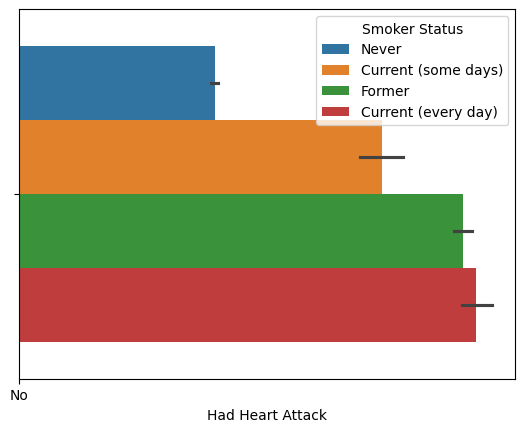

In [287]:
sns.barplot(data=main_heart_df, x='Had Heart Attack', hue='Smoker Status')